In [ ]:
! git clone https://github.com/YunfeiZHAO/sy09_project.git

Cloning into 'sy09_project'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 2), reused 8 (delta 1), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import preprocessing

pd.set_option('display.max_rows', 2000)
data = pd.read_csv("sy09_project/column_3C_weka.csv")
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


In [ ]:
classname = pd.read_csv("sy09_project/column_3C_weka.csv")["class"]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


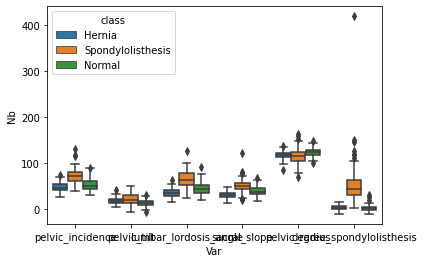

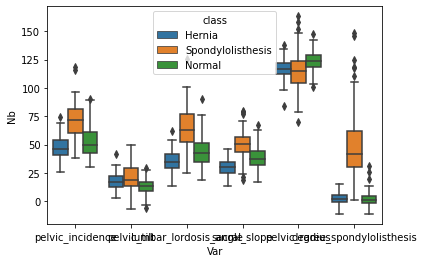

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("sy09_project/column_3C_weka.csv", sep=",")
melt = data.melt(id_vars=["class"],value_vars=["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis"], var_name="Var",value_name="Nb")
sns.boxplot(x="Var", y="Nb", hue="class",data=melt)
plt.show()

data = data.drop(data.degree_spondylolisthesis.idxmax())
melt = data.melt(id_vars=["class"],value_vars=["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis"], var_name="Var",value_name="Nb")
sns.boxplot(x="Var", y="Nb", hue="class",data=melt)
plt.show()

# Analyse

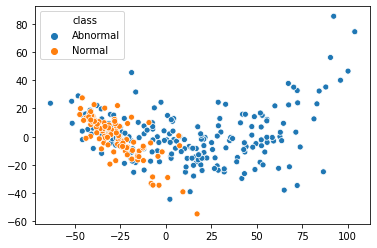

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          309 non-null    float64
 1   pelvic_tilt               309 non-null    float64
 2   lumbar_lordosis_angle     309 non-null    float64
 3   sacral_slope              309 non-null    float64
 4   pelvic_radius             309 non-null    float64
 5   degree_spondylolisthesis  309 non-null    float64
 6   class                     309 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.3+ KB


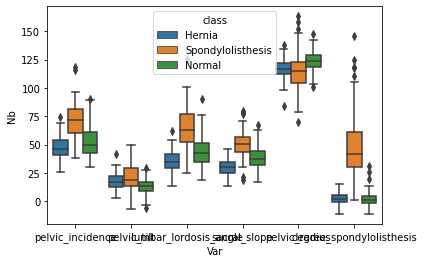

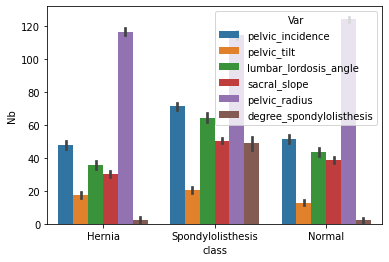

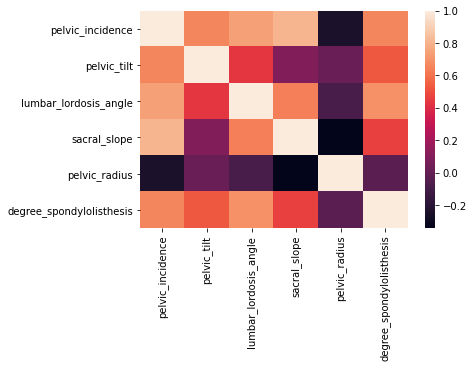

     pelvic_tilt  ...  degree_spondylolisthesis
0      22.552586  ...                 -0.254400
1      10.060991  ...                  4.564259
2      22.218482  ...                 -3.530317
3      24.652878  ...                 11.211523
4       9.652075  ...                  7.918501
5      13.921907  ...                  2.230652
6      15.864336  ...                  5.988551
7      10.755611  ...                -10.675871
8      13.533753  ...                 13.289018
9       5.010884  ...                  0.664437
10     13.040974  ...                 -7.825986
11     17.715819  ...                  0.499751
12     19.964556  ...                  8.028895
13     20.460828  ...                  7.044803
14     24.188885  ...                  5.766947
15     12.537992  ...                  5.415825
16     20.362507  ...                 -0.622527
17      3.144669  ...                  3.623020
18     13.444749  ...                  1.429186
19     12.254074  ...                 -1

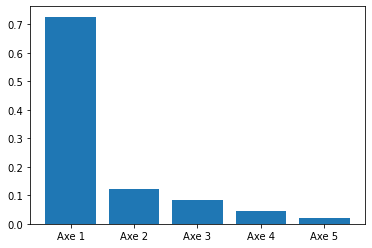

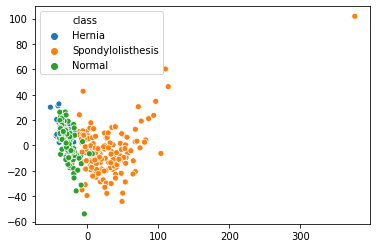

     pelvic_incidence  pelvic_tilt  ...  pelvic_radius  degree_spondylolisthesis
0           63.027818    22.552586  ...      98.672917                 -0.254400
1           39.056951    10.060991  ...     114.405425                  4.564259
2           68.832021    22.218482  ...     105.985135                 -3.530317
3           69.297008    24.652878  ...     101.868495                 11.211523
4           49.712859     9.652075  ...     108.168725                  7.918501
5           40.250200    13.921907  ...     130.327871                  2.230652
6           53.432928    15.864336  ...     120.567523                  5.988551
7           45.366754    10.755611  ...     117.270068                -10.675871
8           43.790190    13.533753  ...     125.002893                 13.289018
9           36.686353     5.010884  ...      84.241415                  0.664437
10          49.706610    13.040974  ...     108.648265                 -7.825986
11          31.232387    17.

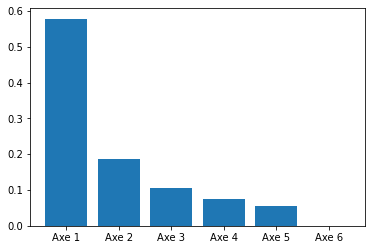

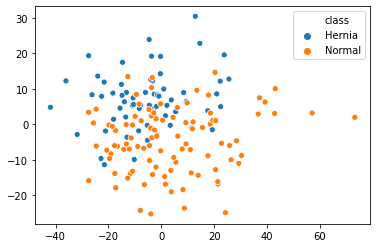

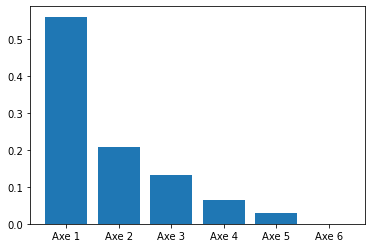

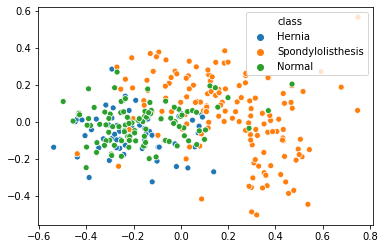

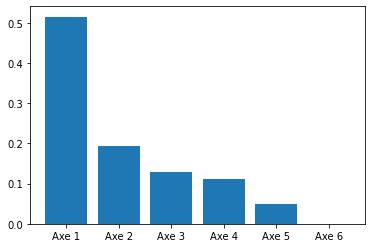

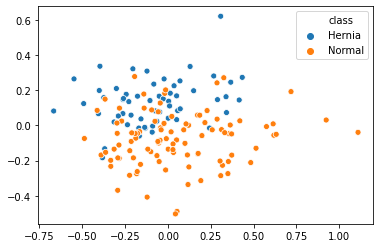

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
import scipy.linalg as linalg
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram

# data = pd.read_csv("sy09_project/column_3C_weka.csv", sep=",")

data2 = pd.read_csv("sy09_project/column_2C_weka.csv", sep=",")
data2 = data2.drop(data2.degree_spondylolisthesis.idxmax())
cls = PCA(n_components = 5)
data_without_class = data2.drop(labels=['class'],axis=1)
acp = cls.fit_transform(data_without_class)

acp_data = cls.transform(data_without_class)
sns.scatterplot(x=acp_data[:,0],y=acp_data[:,1], hue=data2['class'])
plt.show()


#-----------------------------------Analyse exploratoie-------------------------

data.info()
data = data.drop(data.degree_spondylolisthesis.idxmax())
melt = data.melt(id_vars=["class"],value_vars=["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis"], var_name="Var",value_name="Nb")
sns.boxplot(x="Var", y="Nb", hue="class",data=melt)
plt.show()


sns.barplot(x="class", y="Nb", hue="Var",data=melt)
plt.show()
"""
#Egalité PI = SS + PT
data["sum"]=data["pelvic_tilt"]+data["sacral_slope"]
sns.scatterplot(x="pelvic_incidence",y="sum", data=data)
plt.show()
"""
corr = data.corr()
sns.heatmap(corr)
plt.show()

#-----------------------------------ACP-----------------------------------------

data2col = pd.read_csv("sy09_project/column_3C_weka.csv", sep=",")
data2col=data2col.drop(labels=['pelvic_incidence'],axis=1)
#data2col = data2col[data2col['class'] != 'Spondylolisthesis']
cls = PCA(n_components = 5)
data_without_class = data2col.drop(labels=['class'],axis=1)
print(data_without_class)
acp = cls.fit_transform(data_without_class)
print(cls.components_)

print(cls.explained_variance_)
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5"], cls.explained_variance_ratio_)
plt.show()

acp_data = cls.transform(data_without_class)
sns.scatterplot(x=acp_data[:,0],y=acp_data[:,1], hue=data2col['class'])
plt.show()
#-----------------------------------ACP sans classe Spondylolisthesis-----------------------------------------
data2col = pd.read_csv("sy09_project/column_3C_weka.csv", sep=",")
data2col = data2col[data2col['class'] != 'Spondylolisthesis']
cls = PCA(n_components = 6)
data_without_class = data2col.drop(labels=['class'],axis=1)
print(data_without_class)
acp = cls.fit_transform(data_without_class)
print(cls.components_)

print(cls.explained_variance_)
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5", "Axe 6"], cls.explained_variance_ratio_)
plt.show()

acp_data = cls.transform(data_without_class)
sns.scatterplot(x=acp_data[:,0],y=acp_data[:,1], hue=data2col['class'])
plt.show()
#-----------------------------------ACP pre process----------------------------------------
data2col = pd.read_csv("sy09_project/column_3C_weka.csv", sep=",")

from sklearn import preprocessing

x = data2col.drop(labels=['class'], axis=1).values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

cls = PCA(n_components = 6)
acp = cls.fit_transform(df)
#print(cls.components_)

#print(cls.explained_variance_)
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5", "Axe 6"], cls.explained_variance_ratio_)
plt.show()

acp_data = cls.transform(df)
sns.scatterplot(x=acp_data[:,0],y=acp_data[:,1], hue=data2col['class'])
plt.show()

#----------------------pre process sans Spondylolisthesis-------------------

data2col = pd.read_csv("sy09_project/column_3C_weka.csv", sep=",")

data2col = data2col[data2col['class'] != 'Spondylolisthesis']
from sklearn import preprocessing

x = data2col.drop(labels=['class'], axis=1).values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

cls = PCA(n_components = 6)
acp = cls.fit_transform(df)
#print(cls.components_)

#print(cls.explained_variance_)
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5", "Axe 6"], cls.explained_variance_ratio_)
plt.show()

acp_data = cls.transform(df)
sns.scatterplot(x=acp_data[:,0],y=acp_data[:,1], hue=data2col['class'])
plt.show()


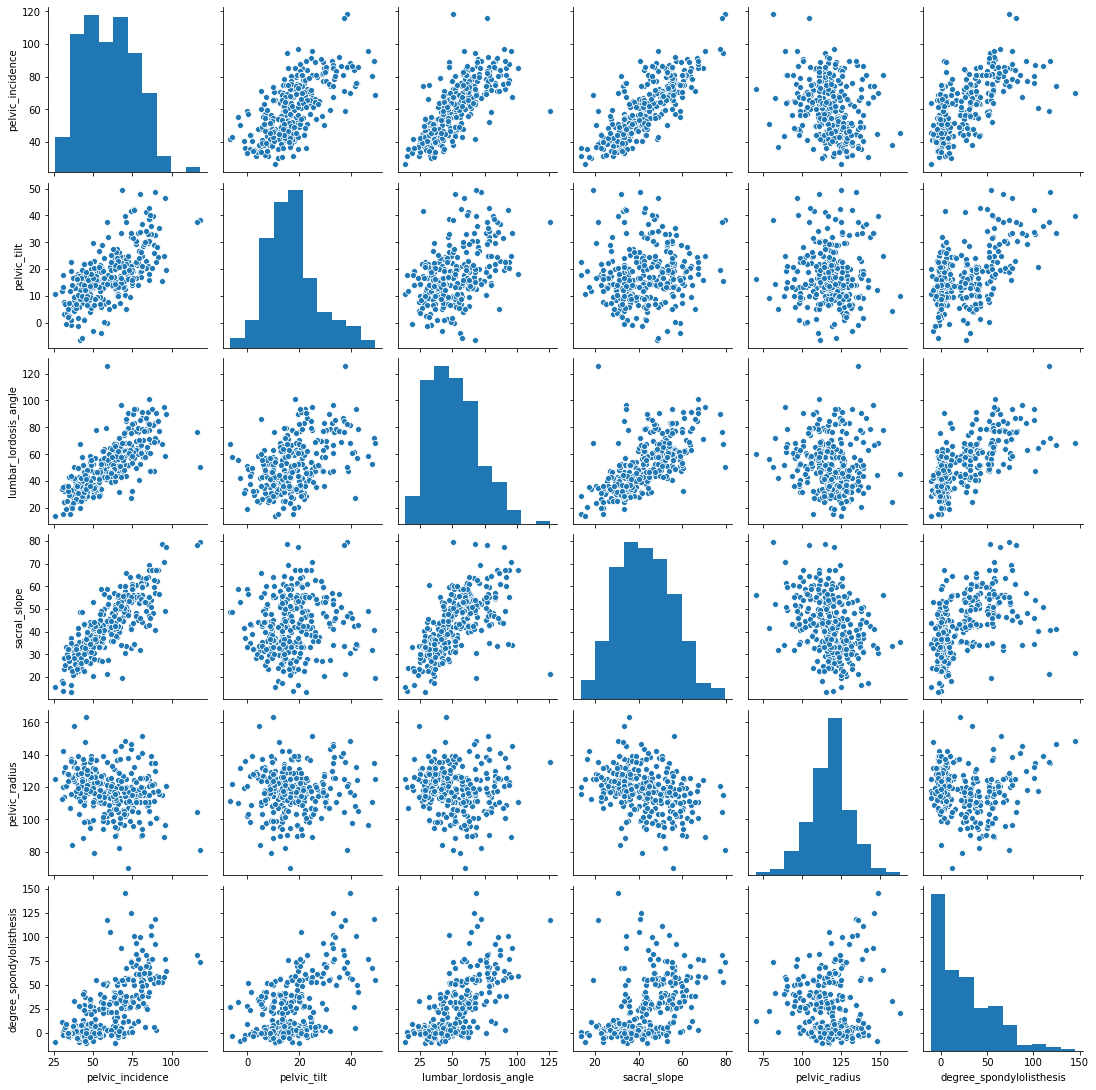

In [ ]:
data.describe
sns.pairplot(data.iloc[:, 0:6])

In [ ]:
data_normalized = (data_without_class-data_without_class.mean())/(data_without_class.std())  
data_normalized.dot(pca.components_)

NameError: ignored

In [ ]:
data['pelvic_incidence'] - data['pelvic_tilt'] - data['sacral_slope']

0      0.000000e+00
1      7.105427e-15
2      0.000000e+00
3     -9.999994e-09
4      9.999965e-10
5     -9.999997e-09
6      7.105427e-15
7      9.999994e-09
8      3.552714e-15
9     -1.000000e-09
10     0.000000e+00
11    -1.776357e-15
12     3.552714e-15
13     7.105427e-15
14     0.000000e+00
15     1.000000e-08
16     0.000000e+00
17    -3.552714e-15
18     3.552714e-15
19    -7.105427e-15
20     0.000000e+00
21     0.000000e+00
22     7.105427e-15
23     0.000000e+00
24    -1.776357e-15
25    -3.552714e-15
26     9.999999e-09
27     0.000000e+00
28     0.000000e+00
29    -9.999994e-09
30     0.000000e+00
31    -7.105427e-15
32     0.000000e+00
33     1.000000e-08
34    -3.552714e-15
35     0.000000e+00
36    -9.999965e-10
37    -9.999997e-09
38     3.552714e-15
39     7.105427e-15
40     0.000000e+00
41     0.000000e+00
42     0.000000e+00
43     0.000000e+00
44     1.000000e-08
45     3.552714e-15
46     3.552714e-15
47    -1.000000e-08
48     3.552714e-15
49     0.000000e+00


     pelvic_incidence  pelvic_tilt  ...  degree_spondylolisthesis              class
0           63.027818    22.552586  ...                 -0.254400             Hernia
1           39.056951    10.060991  ...                  4.564259             Hernia
2           68.832021    22.218482  ...                 -3.530317             Hernia
3           69.297008    24.652878  ...                 11.211523             Hernia
4           49.712859     9.652075  ...                  7.918501             Hernia
5           40.250200    13.921907  ...                  2.230652             Hernia
6           53.432928    15.864336  ...                  5.988551             Hernia
7           45.366754    10.755611  ...                -10.675871             Hernia
8           43.790190    13.533753  ...                 13.289018             Hernia
9           36.686353     5.010884  ...                  0.664437             Hernia
10          49.706610    13.040974  ...                 -7.825986

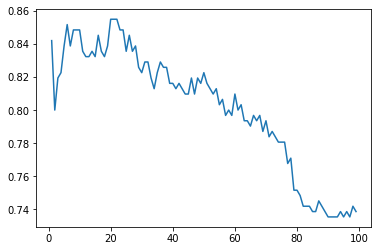

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils import check_X_y
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def accuracy(X_train, y_train, X_val, y_val, n_neighbors):

    # Définition, apprentissage et prédiction par la méthode des
    # plus proches voisins avec `n_neighbors` voisins
    cls = KNeighborsClassifier(n_neighbors=n_neighbors)

    cls.fit(X_train, y_train)
    
    labels = cls.predict(X_val)
    # Calcul de la précision avec `accuracy_score`
    acc = accuracy_score(labels,y_val)

    return acc

def knn_cross_validation(X, y, n_folds, n_neighbors_list):
    # Générer la même sortie de `knn_cross_validation` en utilisant
    # `cross_val_score`
    X, y = check_X_y(X, y)
    
    for i in n_neighbors_list:
        clf = KNeighborsClassifier(i)
        scores = cross_val_score(clf,X, y, cv=n_folds)
        yield i, scores

data2col = pd.read_csv("sy09_project/column_3C_weka.csv", sep=",")
print(data2col)
n_neighbors_list = list(range(1,100))
gen = knn_cross_validation(data2col.drop('class', axis=1), data2col['class'], 5, n_neighbors_list)
neigh=[]
acc = []
for i in gen :
    neigh.append(i[0])
    acc.append(np.mean(i[1]))

accuraciespd = pd.DataFrame(acc)
idxmax = accuraciespd.idxmax(axis=0)
best_k = neigh[idxmax[0]]
print('best_k = ',  best_k)
print('acc = ', acc[best_k])
sns.lineplot(x=neigh, y=acc)
plt.show()

# Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
class outer_CV():
    ''' Cross validation for methods don't need parameters tuning

    '''
    def __init__(self, model, outer_cv = None):
        self.clf = model
        self.nfold = outer_cv

    def fit(self, X, y):
        folds = KFold(n_splits=self.nfold, shuffle=True, random_state=0)
        for err in cross_val_score(self.clf, X, y, cv=folds, scoring='f1_micro'):
            yield (err)


# Nested cross validation

In [ ]:
import logging as log
import pandas as pd
import numpy as np
import numbers
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold, ParameterGrid, ParameterSampler
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.utils.multiclass import type_of_target
from joblib import Parallel, delayed

class NestedCV():
    '''A general class to handle nested cross-validation for any estimator that
    implements the scikit-learn estimator interface.
    Parameters
    ----------
    model : estimator
        The estimator implements scikit-learn estimator interface.
    params_grid : dict
        The dict contains hyperparameters for model.
    outer_cv : int or cv splitter class (e.g. KFold, StratifiedKFold etc.)
    inner_cv : int or cv splitter class (e.g. KFold, StratifiedKFold etc.)
        Inner splitting strategy. If int, KFold is default. For more information,
    n_jobs : int
        Number of jobs to run in parallel
    cv_options: dict, default = {}
        Nested Cross-Validation Options.
        metric : callable from sklearn.metrics, default = mean_squared_error
            A scoring metric used to score each model
        metric_score_indicator_lower : boolean, default = True
            Choose whether lower score is better for the metric calculation or higher score is better,
            `True` means lower score is better.
        sqrt_of_score : boolean, default = False
            Whether or not the square root should be taken of score
        randomized_search : boolean, default = False
            Whether to use gridsearch or randomizedsearch from sklearn
        randomized_search_iter : int, default = 10
            Number of iterations for randomized search
        recursive_feature_elimination : boolean, default = False
            Whether to do recursive feature selection (rfe) for each set of different hyperparameters
            in the inner most loop of the fit function.
        rfe_n_features : int, default = 1
            If recursive_feature_elimination is enabled, select n number of features
        
        predict_proba : boolean, default = False
            If true, predict probabilities instead for a class, instead of predicting a class
        
        multiclass_average : string, default = 'binary'
            For some classification metrics with a multiclass prediction, you need to specify an
            average other than 'binary'
    '''

    def __init__(self, model, params_grid, outer_cv = None, inner_cv = None, n_jobs = 1, cv_options={}):
        self.model = model
        self.params_grid = params_grid
        self.outer_cv = outer_cv
        self.inner_cv = inner_cv
        self.n_jobs = n_jobs
        self.metric = cv_options.get('metric', mean_squared_error)
        self.metric_score_indicator_lower = cv_options.get(
            'metric_score_indicator_lower', True)
        self.sqrt_of_score = cv_options.get('sqrt_of_score', False)
        self.randomized_search = cv_options.get('randomized_search', False)
        self.randomized_search_iter = cv_options.get(
            'randomized_search_iter', 10)
        self.recursive_feature_elimination = cv_options.get(
            'recursive_feature_elimination', False)
        self.rfe_n_features = cv_options.get(
            'rfe_n_features', 0)
        self.predict_proba = cv_options.get(
            'predict_proba', False)
        self.multiclass_average = cv_options.get(
            'multiclass_average', 'binary')
        self.outer_scores = []
        self.best_params = {}
        self.best_inner_score_list = []
        self.variance = []

    # to check if use sqrt_of_score and handle the different cases
    def _transform_score_format(self, scoreValue):
        if self.sqrt_of_score:
            return np.sqrt(scoreValue)
        return scoreValue

    # to convert array of dict to dict with array values, so it can be used as params for parameter tuning
    def _score_to_best_params(self, best_inner_params_list):
        params_dict = {}
        for best_inner_params in best_inner_params_list:
            for key, value in best_inner_params.items():
                if key in params_dict:
                    if value not in params_dict[key]:
                        params_dict[key].append(value)
                else:
                    params_dict[key] = [value]
        return params_dict

    # a function to handle recursive feature elimination
    def _fit_recursive_feature_elimination(self, X_train_outer, y_train_outer, X_test_outer):
        rfe = RFECV(estimator=self.model,
                    min_features_to_select=self.rfe_n_features, cv=self.inner_cv, n_jobs = self.n_jobs)
        rfe.fit(X_train_outer, y_train_outer)
        
        log.info('Best number of features was: {0}'.format(rfe.n_features_))

        # Assign selected features to data
        return rfe.transform(X_train_outer), rfe.transform(X_test_outer)
    
    def _predict_and_score(self, X_test, y_test):
        #XXX: Implement type_of_target(y)
        
        if(self.predict_proba):
            y_type = type_of_target(y_test)
            if(y_type in ('binary')):
                pred = self.model.predict_proba(X_test)[:,1]
            else:
                pred = self.model.predict_proba(X_test)
                
        else:
            pred = self.model.predict(X_test)
        
        if(self.multiclass_average == 'binary'):
            return self.metric(y_test, pred), pred
        else:
            return self.metric(y_test, pred, average=self.multiclass_average), pred
    def _best_of_results(self, results):
        best_score = None
        best_parameters = {}
        
        for score_parameter in results:
            if(self.metric_score_indicator_lower):
                if(best_score == None or score_parameter[0] < best_score):
                    best_score = score_parameter[0]
                    best_parameters = score_parameter[1]
            else:
                if(best_score == None or score_parameter[0] > best_score):
                    best_score = score_parameter[0]
                    best_parameters = score_parameter[1]
        
        return best_score, best_parameters

    def fit(self, X, y):
        '''A method to fit nested cross-validation 
        Parameters
        ----------
        X : pandas dataframe (rows, columns)
            Training dataframe, where rows is total number of observations and columns
            is total number of features
        y : pandas dataframe
            Output dataframe, also called output variable. y is what you want to predict.
        Returns
        -------
        It will not return directly the values, but it's accessable from the class object it self.
        You should be able to access:
        variance
            Model variance by numpy.var()
        outer_scores 
            Outer score List.
        best_inner_score_list 
            Best inner scores for each outer loop
        best_params 
            All best params from each inner loop cumulated in a dict
        best_inner_params_list 
            Best inner params for each outer loop as an array of dictionaries
        '''
        
        log.debug(
            '\n{0} <-- Running this model now'.format(type(self.model).__name__))

        self.X = X
        self.y = y

        # If Pandas dataframe or series, convert to array
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X = X.to_numpy()
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = y.to_numpy()
        if(self.randomized_search):
            param_func = ParameterSampler(param_distributions=self.params_grid,
                                                   n_iter=self.randomized_search_iter)
        else:
            param_func = ParameterGrid(param_grid=self.params_grid)
        
        if(isinstance(self.outer_cv, numbers.Number) and
           isinstance(self.inner_cv, numbers.Number)):
            outer_cv = KFold(n_splits=self.outer_cv, shuffle=True, random_state=0)
            inner_cv = KFold(n_splits=self.inner_cv, shuffle=True, random_state=0)
        else:
            outer_cv = self.outer_cv
            inner_cv = self.inner_cv

        outer_scores = []
        variance = []
        best_inner_params_list = []  # Change both to by one thing out of key-value pair
        best_inner_score_list = []

        # Split X and y into K-partitions to Outer CV
        for (i, (train_index, test_index)) in enumerate(outer_cv.split(X, y)):
            log.debug(
                '\n{0}/{1} <-- Current outer fold'.format(i+1, self.outer_cv))
            X_train_outer, X_test_outer = X[train_index], X[test_index]
            y_train_outer, y_test_outer = y[train_index], y[test_index]
            best_inner_params = {}
            best_inner_score = None
            search_scores = []

            # Split X_train_outer and y_train_outer into K-partitions to be inner CV
            for (j, (train_index_inner, test_index_inner)) in enumerate(inner_cv.split(X_train_outer, y_train_outer)):
                log.debug(
                    '\n\t{0}/{1} <-- Current inner fold'.format(j+1, self.inner_cv))
                X_train_inner, X_test_inner = X_train_outer[train_index_inner], X_train_outer[test_index_inner]
                y_train_inner, y_test_inner = y_train_outer[train_index_inner], y_train_outer[test_index_inner]
                
                if self.recursive_feature_elimination:
                        X_train_inner, X_test_inner = self._fit_recursive_feature_elimination(
                                    X_train_inner, y_train_inner, X_test_inner)
                
                def _parallel_fitting(X_train_inner, X_test_inner, y_train_inner, y_test_inner, param_dict):
                    log.debug(
                        '\n\tFitting these parameters:\n\t{0}'.format(param_dict))
                    # Set hyperparameters, train model on inner split, predict results.
                    self.model.set_params(**param_dict)

                    # Fit model with current hyperparameters and score it
                    self.model.fit(X_train_inner, y_train_inner)
                    
                    # Predict and score model
                    inner_grid_score, inner_pred = self._predict_and_score(X_test_inner, y_test_inner)
                    
                    # Cleanup for Keras
                    if(type(self.model).__name__ == 'KerasRegressor' or
                       type(self.model).__name__ == 'KerasClassifier'):
                        from keras import backend as K
                        K.clear_session()
                    
                    return self._transform_score_format(inner_grid_score), param_dict
            
                results = Parallel(n_jobs=self.n_jobs)(delayed(_parallel_fitting)(
                                                    X_train_inner, X_test_inner,
                                                    y_train_inner, y_test_inner,
                                                    param_dict=parameters)
                                            for parameters in param_func)
                search_scores.extend(results)
            
            best_inner_score, best_inner_params = self._best_of_results(search_scores)
            
            best_inner_params_list.append(best_inner_params)
            best_inner_score_list.append(best_inner_score)

            # Fit the best hyperparameters from one of the K inner loops
            self.model.set_params(**best_inner_params)
            self.model.fit(X_train_outer, y_train_outer)
            
            # Get score and prediction
            score,pred = self._predict_and_score(X_test_outer, y_test_outer)
            outer_scores.append(self._transform_score_format(score))

            # Append variance
            variance.append(np.var(pred, ddof=1))

            log.debug('\nResults for outer fold:\nBest inner parameters was: {0}'.format(
                best_inner_params_list[i]))
            log.debug('Outer score: {0}'.format(outer_scores[i]))
            log.debug('Inner score: {0}'.format(best_inner_score_list[i]))
         
        self.variance = variance
        self.outer_scores = outer_scores
        self.best_inner_score_list = best_inner_score_list
        self.best_params = self._score_to_best_params(best_inner_params_list)
        self.best_inner_params_list = best_inner_params_list

    # Method to show score vs variance chart. You can run it only after fitting the model.
    def score_vs_variance_plot(self):
        # Plot score vs variance
        plt.figure()
        plt.subplot(211)

        variance_plot, = plt.plot(self.variance, color='b')
        score_plot, = plt.plot(self.outer_scores, color='r')

        plt.legend([variance_plot, score_plot],
                   ["Variance", "Score"],
                   bbox_to_anchor=(0, .4, .5, 0))

        plt.title("{0}: Score VS Variance".format(type(self.model).__name__),
                  x=.5, y=1.1, fontsize="15")
    
    # Show some detail scores
    def show_ncv_details(self):
      print(f'best_inner_params_list: {self.best_inner_params_list}')
      print(f'best_params: {self.best_params}')
      print(f'best_inner_score_list: {self.best_inner_score_list}')
      print(f'outer_scores: {self.outer_scores}')
      self.score_vs_variance_plot()

# PCA Plot


## Plot

In [ ]:
def scatterplot_pca(
    columns=None, hue=None, style=None, data=None, pc1=1, pc2=2, **kwargs
):
    """
    Utilise `sns.scatterplot` en appliquant d'abord une ACP si besoin
    pour réduire la dimension.
    """

    # Select columns (should be numeric)
    data_quant = data if columns is None else data[columns]
    data_quant = data_quant.drop(
        columns=[e for e in [hue, style] if e is not None], errors="ignore"
    )

    # Reduce to two dimensions
    if data_quant.shape[1] == 2:
        data_pca = data_quant
        pca = None
    else:
        n_components = max(pc1, pc2)
        pca = PCA(n_components=n_components)
        data_pca = pca.fit_transform(data_quant)
        data_pca = pd.DataFrame(
            data_pca[:, [pc1 - 1, pc2 - 1]], columns=[f"PC{pc1}", f"PC{pc2}"]
        )

    # Keep name, force categorical data for hue and steal index to
    # avoid unwanted alignment
    if isinstance(hue, pd.Series):
        if not hue.name:
            hue.name = "hue"
        hue_name = hue.name
    elif isinstance(hue, str):
        hue_name = hue
        hue = data[hue]
    elif isinstance(hue, np.ndarray):
        hue = pd.Series(hue, name="class")
        hue_name = "class"

    hue = hue.astype("category")
    hue.index = data_pca.index
    hue.name = hue_name

    if isinstance(style, pd.Series):
        if not style.name:
            style.name = "style"
        style_name = style.name
    elif isinstance(style, str):
        style_name = style
        style = data[style]
    elif isinstance(style, np.ndarray):
        style = pd.Series(style, name="style")
        style_name = "style"

    sp_kwargs = {}
    full_data = data_pca
    if hue is not None:
        full_data = pd.concat((full_data, hue), axis=1)
        sp_kwargs["hue"] = hue_name
    if style is not None:
        full_data = pd.concat((full_data, style), axis=1)
        sp_kwargs["style"] = style_name

    x, y = data_pca.columns
    ax = sns.scatterplot(x=x, y=y, data=full_data, **sp_kwargs)

    return ax, pca

# change class to number 0,1,2 and create dataset

In [ ]:
data["class"].value_counts()

Spondylolisthesis    149
Normal               100
Hernia                60
Name: class, dtype: int64

In [ ]:
pd.factorize(data["class"])[1]

Index(['Hernia', 'Spondylolisthesis', 'Normal'], dtype='object')

In [ ]:
pd.factorize(data["class"])[1]
data["class"] = pd.factorize(data["class"])[0]
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0


In [ ]:
from sklearn.decomposition import PCA

data_without_class = data.drop(labels=['class'],axis=1)
data_without_class_scaled = preprocessing.scale(data_without_class)
pca = PCA(n_components = 5)
pca_data = pca.fit_transform(data_without_class)

pca_df = pd.DataFrame(data=pca_data, columns=["X1", "X2", "X3", "X4", "X5"])
pca_df["class"] = data["class"]
pca.components_

array([[ 0.37926307,  0.16205897,  0.4219213 ,  0.21720411, -0.03497921,
         0.77683825],
       [-0.42639679,  0.04672118, -0.2830589 , -0.47311797,  0.50478936,
         0.50717617],
       [-0.1348731 , -0.09198747, -0.50988931, -0.04288564, -0.77231727,
         0.33918622],
       [ 0.49953519,  0.72909604, -0.38749365, -0.22956085,  0.04204071,
        -0.11944297],
       [-0.27071352,  0.31333362,  0.57595281, -0.58404715, -0.38173652,
        -0.09990373]])

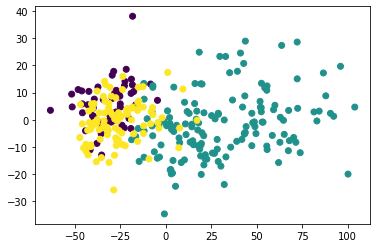

In [ ]:
plt.scatter(x=pca_data[:, 0], y=pca_data[:, 3], c=data["class"])

In [ ]:
pca.components_

array([[ 0.37926307,  0.16205897,  0.4219213 ,  0.21720411, -0.03497921,
         0.77683825],
       [-0.42639679,  0.04672118, -0.2830589 , -0.47311797,  0.50478936,
         0.50717617],
       [-0.1348731 , -0.09198747, -0.50988931, -0.04288564, -0.77231727,
         0.33918622],
       [ 0.49953519,  0.72909604, -0.38749365, -0.22956085,  0.04204071,
        -0.11944297],
       [-0.27071352,  0.31333362,  0.57595281, -0.58404715, -0.38173652,
        -0.09990373]])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          309 non-null    float64
 1   pelvic_tilt               309 non-null    float64
 2   lumbar_lordosis_angle     309 non-null    float64
 3   sacral_slope              309 non-null    float64
 4   pelvic_radius             309 non-null    float64
 5   degree_spondylolisthesis  309 non-null    float64
 6   class                     309 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 29.3 KB


0: viola


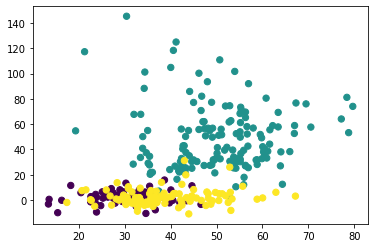

In [ ]:
plt.scatter(data= data, x="sacral_slope", y="degree_spondylolisthesis", c="class", s=40, cmap='viridis');

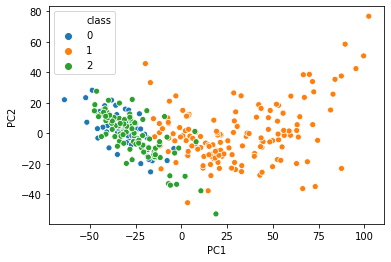

In [ ]:
ax, pca = scatterplot_pca(data=data_without_class, hue=data["class"],pc1=1, pc2=2)

In [ ]:
pca.explained_variance_ratio_

array([0.6908744 , 0.13828058, 0.07766464, 0.05387509, 0.03930529])

In [ ]:
pca_data

array([[-22.8000659 , -18.95375457,  11.86998214,  12.50643478,
          4.89632893],
       [-39.37345189,  10.63117306,  13.66949922,  -0.19940501,
         -0.71641369],
       [-17.69722505, -25.28606668,  -1.2490682 ,  10.38970025,
          3.2089984 ],
       ...,
       [-23.83305983,  -6.93076215, -12.88449425,  11.10166434,
          0.09368702],
       [-32.13581384,  -0.45870868,  -0.48542871,  -5.56428354,
          1.156382  ],
       [-41.33817904,  11.83884307,  -0.06994461,  -9.92314359,
          2.79632924]])

# 3D plot

Text(0.5, 0, 'PC3')

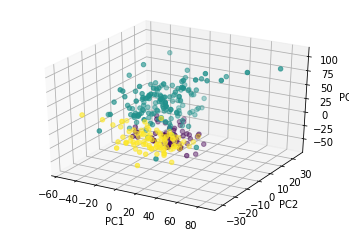

In [ ]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = pca_data[:, 0]
xdata = pca_data[:, 1]
ydata = pca_data[:, 2]
ax.scatter3D(xdata, ydata, zdata, c=data["class"], cmap='viridis');
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

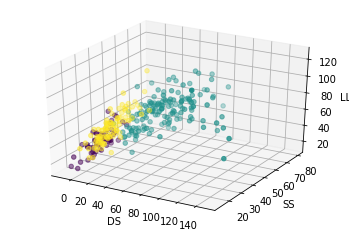

In [ ]:

ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = data["degree_spondylolisthesis"]
ydata = data["sacral_slope"]
zdata = data["lumbar_lordosis_angle"]
ax.scatter3D(xdata, ydata, zdata, c=data["class"], cmap='viridis');
ax.set_xlabel('DS')
ax.set_ylabel('SS')
ax.set_zlabel('LLA')

# Gaussian mixture model(GMM)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3f852f3320>,
 PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False))

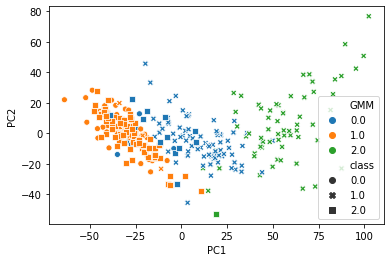

In [ ]:
from sklearn import mixture
import pandas as pd


data_without_class = data.drop(labels=['class'],axis=1)

data_without_class_scaled = preprocessing.scale(data_without_class)
gmm = mixture.GaussianMixture(n_components=3).fit(data_without_class_scaled)
labels = pd.Series(gmm.predict(data_without_class_scaled), name="GMM")
scatterplot_pca(data=data, hue=labels, style=data["class"])

In [ ]:
y_true = data["class"]
y_pred = labels
confusion_matrix(y_true, y_pred, labels=[0,1,2])

array([[ 6, 54,  0],
       [82,  2, 64],
       [12, 87,  1]])

In [ ]:
f1_score(y_true, y_pred, average="weighted")

0.02515092686132986

# Kmeans

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3f852a3f28>,
 PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False))

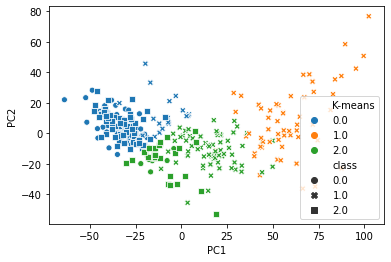

In [ ]:
from sklearn.cluster import KMeans

cls = KMeans(n_clusters=3, init="random")
cls.fit(data_without_class_scaled)
labels = pd.Series(cls.labels_, name="K-means")
scatterplot_pca(data=data, hue=labels, style=data["class"])


In [ ]:
y_true = data["class"]
y_pred = labels
confusion_matrix(y_true, y_pred, labels=[0,1,2])

array([[51,  0,  9],
       [16, 59, 73],
       [73,  0, 27]])

In [ ]:
f1_score(y_true, y_pred, average="weighted")

0.4571573712097947

# PCA + KNN
1,pure knn

2, dimension: the first 5 important axe \\
apply it to knn with 3 class \\
plot it to the first main plan

In [ ]:
pca_data.shape

(309, 5)

In [ ]:
from math import sqrt
import scipy.linalg as linalg
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score


# kmeans with nested cross validation
n_neighbors_list = np.unique(np.round(np.geomspace(1, 155, 100)).astype(int))
p_grid = {"n_neighbors": n_neighbors_list}
cls = KNeighborsClassifier()
knn_pca_NCV = NestedCV(cls, p_grid, outer_cv = 5, inner_cv = 10, n_jobs = 10, cv_options={'metric':f1_score, 
                           'metric_score_indicator_lower':False,
                           'randomized_search_iter':30, 
                           'predict_proba':False,
                           'multiclass_average': 'micro'})
knn_pca_predict = knn_pca_NCV.fit(pca_data, data["class"])

knn_NCV = NestedCV(cls, p_grid, outer_cv = 5, inner_cv = 10, n_jobs = 10, cv_options={'metric':f1_score, 
                           'metric_score_indicator_lower':False,
                           'randomized_search_iter':30, 
                           'predict_proba':False,
                           'multiclass_average': 'micro'})
knn_predict = knn_NCV.fit(data_without_class_scaled, data["class"])

#score = nested_cross_validation(pca_data, data3c['class'], cls, p_grid)
#print(score)



knn_pca mean score 0.8314648334214703
best_inner_params_list: [{'n_neighbors': 21}, {'n_neighbors': 14}, {'n_neighbors': 3}, {'n_neighbors': 22}, {'n_neighbors': 30}]
best_params: {'n_neighbors': [21, 14, 3, 22, 30]}
best_inner_score_list: [1.0, 1.0, 1.0, 1.0, 1.0]
outer_scores: [0.8225806451612904, 0.7580645161290323, 0.8225806451612904, 0.8360655737704918, 0.9180327868852459]
knn mean score 0.8117398202009518
best_inner_params_list: [{'n_neighbors': 1}, {'n_neighbors': 11}, {'n_neighbors': 1}, {'n_neighbors': 1}, {'n_neighbors': 10}]
best_params: {'n_neighbors': [1, 11, 10]}
best_inner_score_list: [0.96, 1.0, 0.92, 0.92, 0.96]
outer_scores: [0.8225806451612904, 0.7580645161290323, 0.8387096774193549, 0.7868852459016392, 0.8524590163934426]


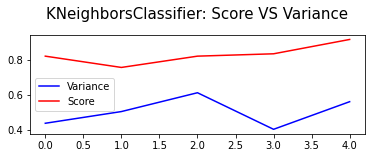

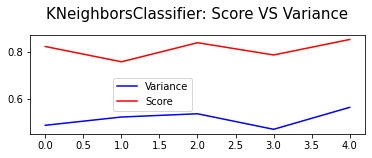

In [ ]:
print(f'knn_pca mean score {np.mean(knn_pca_NCV.outer_scores)}')
knn_pca_NCV.show_ncv_details()
print(f'knn mean score {np.mean(knn_NCV.outer_scores)}')
knn_NCV.show_ncv_details()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3f84eeb518>,
 PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False))

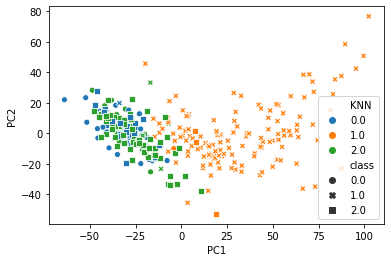

In [ ]:
knn_pca_NCV.model.n_neighbors = 8
knn_pca_NCV.model.fit(pca_data, data["class"])
labels = pd.Series(knn_pca_NCV.model.predict(pca_data), name="KNN")
scatterplot_pca(data=data, hue=labels, style=data["class"])

In [ ]:
data
data_without_class 

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437


# Bayes

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
bayes_Gaussian_CV = outer_CV(clf, 10)
precision = np.array(list(bayes_Gaussian_CV.fit(data_without_class, data["class"])))
print(np.mean(precision))

0.8161290322580644


# LDA and QDA


In [ ]:
data_drop_pt = data.drop(labels=['pelvic_tilt', 'class'],axis=1)
data_without_class_pt_scaled = preprocessing.scale(data_without_class)

In [ ]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
LinearDiscriminantAnalysis_CV = outer_CV(clf, 10)
precision = np.array(list(LinearDiscriminantAnalysis_CV.fit(data_without_class_scaled, data["class"])))
print(np.mean(precision))

0.7903225806451613


In [ ]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()
QuadraticDiscriminantAnalysis_CV = outer_CV(clf, 10)
precision = np.array(list(QuadraticDiscriminantAnalysis_CV.fit(data_without_class_scaled, data["class"])))
print(np.mean(precision))

0.8258064516129032


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminan

# Logisique Regression

Logistique Regression mean score 0.8516129032258064
best_inner_params_list: [{'penalty': 'l2'}, {'penalty': 'none'}, {'penalty': 'l2'}, {'penalty': 'l2'}, {'penalty': 'l2'}, {'penalty': 'none'}, {'penalty': 'l2'}, {'penalty': 'l2'}, {'penalty': 'none'}, {'penalty': 'l2'}]
best_params: {'penalty': ['l2', 'none']}
best_inner_score_list: [0.9285714285714286, 1.0, 0.9285714285714286, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143]
outer_scores: [0.7419354838709677, 0.7741935483870968, 0.9032258064516129, 0.8709677419354839, 0.7741935483870968, 0.9032258064516129, 0.8709677419354839, 0.8064516129032258, 0.9032258064516129, 0.967741935483871]


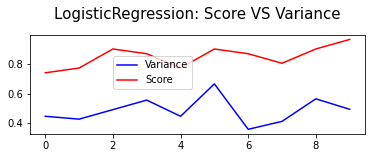

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_grid = {
    'penalty': ['l2', 'none']
}
cls = LogisticRegression()
LR_NCV = NestedCV(cls, LR_grid, outer_cv = 10, inner_cv = 10, n_jobs = 10, cv_options={'metric':f1_score, 
                           'metric_score_indicator_lower':False,
                           'randomized_search_iter':30, 
                           'predict_proba':False,
                           'multiclass_average': 'micro'})
LR_NCV.fit(data_without_class_scaled, data["class"])
print(f'Logistique Regression mean score {np.mean(LR_NCV.outer_scores)}')
LR_NCV.show_ncv_details()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_grid = {
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': np.logspace(-6, 1, 20)
}
cls = DecisionTreeClassifier()
DT_NCV = NestedCV(cls, DT_grid, outer_cv = 10, inner_cv = 10, n_jobs = 10, cv_options={'metric':f1_score, 
                           'metric_score_indicator_lower':False,
                           'randomized_search_iter':30, 
                           'predict_proba':False,
                           'multiclass_average': 'micro'})
DT_NCV.fit(data_without_class, data["class"])


Decision Tree mean score 0.8091397849462366
best_inner_params_list: [{'ccp_alpha': 1e-06, 'criterion': 'gini'}, {'ccp_alpha': 0.026366508987303555, 'criterion': 'entropy'}, {'ccp_alpha': 0.0008858667904100823, 'criterion': 'gini'}, {'ccp_alpha': 1e-06, 'criterion': 'entropy'}, {'ccp_alpha': 6.951927961775606e-05, 'criterion': 'entropy'}, {'ccp_alpha': 1.274274985703132e-05, 'criterion': 'entropy'}, {'ccp_alpha': 0.011288378916846883, 'criterion': 'gini'}, {'ccp_alpha': 6.951927961775606e-05, 'criterion': 'gini'}, {'ccp_alpha': 6.951927961775606e-05, 'criterion': 'gini'}, {'ccp_alpha': 0.004832930238571752, 'criterion': 'gini'}]
best_params: {'ccp_alpha': [1e-06, 0.026366508987303555, 0.0008858667904100823, 6.951927961775606e-05, 1.274274985703132e-05, 0.011288378916846883, 0.004832930238571752], 'criterion': ['gini', 'entropy']}
best_inner_score_list: [0.9642857142857143, 0.9642857142857143, 0.9642857142857143, 0.9285714285714286, 0.9285714285714286, 1.0, 0.9642857142857143, 1.0, 0.964

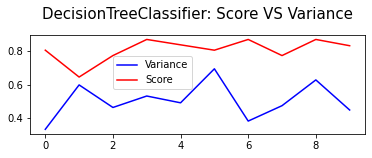

In [ ]:
print(f'Decision Tree mean score {np.mean(DT_NCV.outer_scores)}')
DT_NCV.show_ncv_details()

In [ ]:
np.mean(DT_NCV.best_params["ccp_alpha"])

0.006208135280372437

In [ ]:
import graphviz 
from sklearn import tree

data = pd.read_csv("sy09_project/column_3C_weka.csv", sep=",")
data = data.drop(data.degree_spondylolisthesis.idxmax())
data_without_class = data.drop(labels=['class'],axis=1)
clf = tree.DecisionTreeClassifier(criterion='gini', ccp_alpha=0.008)
clf = clf.fit(data_without_class, data["class"])

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=list(data_without_class.columns),  
                     class_names=clf.classes_,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
graph.render("tree") 


'tree.pdf'

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tree") 

'tree.pdf'

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=data.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

AttributeError: ignored

# Random Forest

In [ ]:
x = np.array([3, 1, 2])
idx = np.argsort(x)[::-1]
x[idx]

array([3, 2, 1])

In [ ]:
importances

array([0.10614684, 0.08799867, 0.12508705, 0.13462788, 0.10761809,
       0.43852148])

In [ ]:
type(names)

list

In [ ]:
idx

array([5, 2, 3, 4, 0, 1])

Feature ranking:
degree_spondylolisthesis : 0.42374312274668147 
sacral_slope : 0.14772134221786454 
lumbar_lordosis_angle : 0.12971903248880018 
pelvic_radius : 0.11735425354229616 
pelvic_incidence : 0.1034628120864964 
pelvic_tilt : 0.07799943691786133 


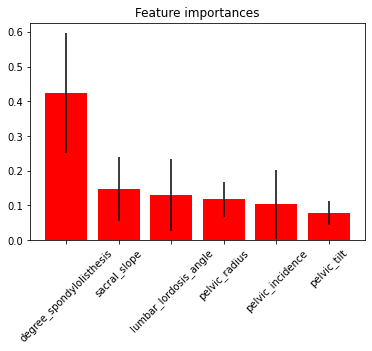

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.tree import plot_tree
import seaborn as sns

X = data.drop(labels=['class'],axis=1)
Y = data["class"]
names = data_without_class.columns.values.tolist()
rf = RandomForestClassifier()
rf.fit(X, Y)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

# Print the feature ranking
print("Feature ranking:")

idx = np.argsort(importances)[::-1]
for f in idx:
    print(f'{names[f]} : {importances[f]} ')

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[idx],
        color="r", yerr=std[idx], align="center")
names = [names[i] for i in idx]
plt.xticks(range(X.shape[1]), names, rotation=45)

plt.show()



In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_grid = {
    'bootstrap': [True],
    'criterion': ['gini', 'entropy'],
    'max_features': [2, 3],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [200, 300, 1000]
}
cls = RandomForestClassifier()
RF_NCV = NestedCV(cls, RF_grid, outer_cv = 5, inner_cv = 10, n_jobs = 10, cv_options={'metric':f1_score, 
                           'metric_score_indicator_lower':False,
                           'randomized_search_iter':30, 
                           'predict_proba':False,
                           'multiclass_average': 'micro'})
RF_NCV.fit(data_without_class, data["class"])

Rf mean score 0.838339502908514
best_inner_params_list: [{'bootstrap': True, 'criterion': 'gini', 'max_features': 2, 'min_samples_split': 8, 'n_estimators': 200}, {'bootstrap': True, 'criterion': 'entropy', 'max_features': 3, 'min_samples_split': 10, 'n_estimators': 200}, {'bootstrap': True, 'criterion': 'entropy', 'max_features': 3, 'min_samples_split': 12, 'n_estimators': 300}, {'bootstrap': True, 'criterion': 'gini', 'max_features': 2, 'min_samples_split': 8, 'n_estimators': 200}, {'bootstrap': True, 'criterion': 'gini', 'max_features': 2, 'min_samples_split': 8, 'n_estimators': 300}]
best_params: {'bootstrap': [True], 'criterion': ['gini', 'entropy'], 'max_features': [2, 3], 'min_samples_split': [8, 10, 12], 'n_estimators': [200, 300]}
best_inner_score_list: [1.0, 0.92, 0.96, 1.0, 0.96]
outer_scores: [0.7419354838709677, 0.8548387096774194, 0.8387096774193549, 0.8709677419354839, 0.8852459016393442]


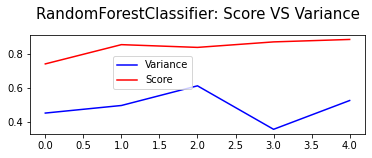

In [ ]:
print(f'Rf mean score {np.mean(RF_NCV.outer_scores)}')
RF_NCV.show_ncv_details()

# SVC

Select the hyperparameter c that gives the model the highest f1_score with nested cross validation. Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

C_candidates = dict(C=np.logspace(-4, 4, 10))
SVC_ncv = NestedCV(SVC(), C_candidates, outer_cv = 5, inner_cv = 10, n_jobs = 10, cv_options={'metric':f1_score, 
                           'metric_score_indicator_lower':False,
                           'randomized_search_iter':30, 
                           'predict_proba':False,
                           'multiclass_average': 'weighted'})
y_true = pd.factorize(data["class"])[0]
SVC_ncv.fit(data_without_class_scaled, y_true)

SVC mean score 0.8335221350357216
best_inner_params_list: [{'C': 2.782559402207126}, {'C': 0.3593813663804626}, {'C': 2.782559402207126}, {'C': 2.782559402207126}, {'C': 2.782559402207126}]
best_params: {'C': [2.782559402207126, 0.3593813663804626]}
best_inner_score_list: [1.0, 1.0, 0.92, 0.9229166666666666, 0.9615238095238096]
outer_scores: [0.8318060227708121, 0.7903923278116827, 0.8188582914291318, 0.8408913490880704, 0.8856626840789109]


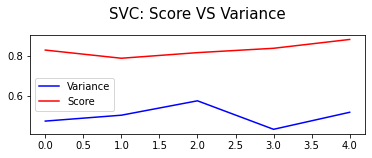

In [ ]:
print(f'SVC mean score {np.mean(SVC_ncv.outer_scores)}')
SVC_ncv.show_ncv_details()

# add boundry

In [ ]:
def add_decision_boundary(model,X,y, levels=None, resolution=.02, ax=None, label=None, color=None):
    """Trace une frontière de décision sur une figure existante.
                    
    La fonction utilise `model` pour prédire un score ou une classe
    sur une grille de taille `resolution`x`resolution`. Une (ou
    plusieurs frontières) sont ensuite tracées d'après le paramètre
    `levels` qui fixe la valeur des lignes de niveaux recherchées.
    """
    if ax is None:
        ax = plt.gca()
    if callable(model):
        if levels is None:
            levels = [0]
        def predict(X):
            return model(X)
    else:
        n_classes = len(model.classes_)
        if n_classes == 2:
            if hasattr(model, "decision_function"):
                if levels is None:
                    levels = [0]
                def predict(X):
                    return model.decision_function(X)
            elif hasattr(model, "predict_proba"):
                if levels is None:
                    levels = [.5]
                def predict(X):
                    pred = model.predict_proba(X)
                    if pred.shape[1] > 1:
                        return pred[:, 0]
                    else:
                        return pred
            elif hasattr(model, "predict"):
                if levels is None:
                    levels = [.5]
                def predict(X):
                    return model.predict(X)
            else:
                raise Exception("Modèle pas reconnu")
        else:
            levels = np.arange(n_classes - 1) + .5
            def predict(X):
                pred = model.predict(X)
                _, idxs = np.unique(pred, return_inverse=True)
                return idxs
 

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 10),
                         np.arange(y_min, y_max, 10))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    print("HERE")

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)

# NCA

 ## NCA + logistique regression

<BarContainer object of 6 artists>

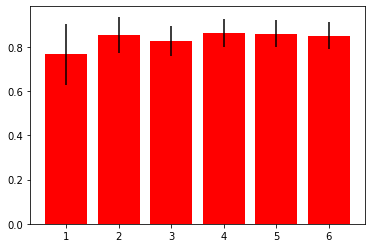

In [ ]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.linear_model import LogisticRegression

X = data.drop(labels=['class'],axis=1)
y = data["class"]
dims = np.arange(6) + 1
precisions = np.zeros(6)
std = np.zeros(6)
for dim in dims:
  nca = NeighborhoodComponentsAnalysis(dim)
  X_nca = nca.fit_transform(X,y)
  X_nca_scaled = preprocessing.scale(X_nca)
  clf = LogisticRegression(max_iter=1000)
  CV = outer_CV(clf, 10)
  precisions[dim - 1] = np.mean(np.array(list(CV.fit(X_nca_scaled, data["class"]))))
  std[dim - 1]  = np.std(np.array(list(CV.fit(X_nca, data["class"]))))

plt.bar(dims, precisions, color="r", yerr=std, align="center")


In [ ]:
precisions

array([0.76709677, 0.85462366, 0.82870968, 0.8644086 , 0.86107527,
       0.85139785])

## NCA + Random Forest

In [ ]:
best_params: {'bootstrap': [True], 'criterion': ['gini'], 'max_features': [2, 3], 'min_samples_split': [8, 10], 'n_estimators': [200, 300]}

<BarContainer object of 6 artists>

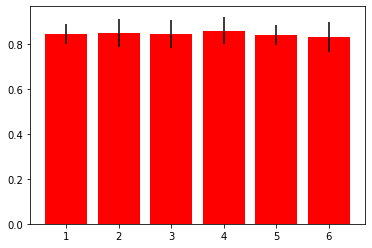

In [ ]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.ensemble import RandomForestClassifier

X = data.drop(labels=['class'],axis=1)
dims = np.arange(6) + 1
precisions = np.zeros(6)
std = np.zeros(6)
for dim in dims:
  nca = NeighborhoodComponentsAnalysis(dim)
  X_nca = nca.fit_transform(X,y)
  clf = RandomForestClassifier(bootstrap=True, criterion='gini')
  CV = outer_CV(clf, 10)
  precisions[dim - 1] = np.mean(np.array(list(CV.fit(X_nca_scaled, data["class"]))))
  std[dim - 1]  = np.std(np.array(list(CV.fit(X_nca, data["class"]))))

plt.bar(dims, precisions, color="r", yerr=std, align="center")


In [ ]:
precisions

array([0.84473118, 0.8511828 , 0.84473118, 0.86086022, 0.84150538,
       0.8316129 ])

## Plot NCA + arbre de décision


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


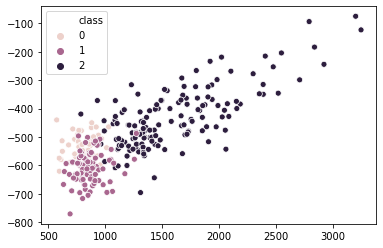

HERE


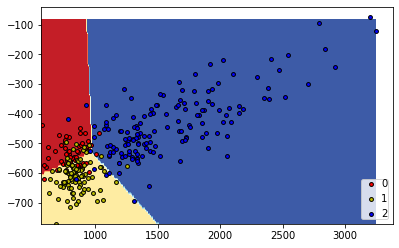

In [ ]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.linear_model import LogisticRegression
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

data = pd.read_csv("sy09_project/column_3C_weka.csv") 
data = data.drop(data.degree_spondylolisthesis.idxmax())

plot_colors = "ryb"



nca = NeighborhoodComponentsAnalysis(2)

X = data.drop(labels=['class'],axis=1)
#X = preprocessing.scale(X)
y = data['class']

y[y=="Hernia"]=0
y[y=="Normal"]=1
y[y=="Spondylolisthesis"]=2
y=y.astype(int)
x = nca.fit_transform(X,y)

col1=x[:,0]
col2=x[:,1]

sns.scatterplot(x=col1, y=col2, hue="class", data=data)
plt.show()

clf = LogisticRegression(max_iter=1000) 
clf.fit(x, y)

add_decision_boundary(clf,x,y)
plt.show()


#col1=x[:,0]
#col2=x[:,1]
#sns.scatterplot(x=col1, y=col2, hue="class", data=data)

In [ ]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

data = pd.read_csv("sy09_project/column_3C_weka.csv") 
data = data.drop(data.degree_spondylolisthesis.idxmax())

plot_colors = "ryb"



nca = NeighborhoodComponentsAnalysis(2)

X = data.drop(labels=['class'],axis=1)
#X = preprocessing.scale(X)
y = data['class']

y[y=="Hernia"]=0
y[y=="Normal"]=1
y[y=="Spondylolisthesis"]=2
y=y.astype(int)
x = nca.fit_transform(X,y)

col1=x[:,0]
col2=x[:,1]

sns.scatterplot(x=col1, y=col2, hue="class", data=data)
plt.show()

clf = RandomForestClassifier(bootstrap=True, criterion='gini', n_estimators=100, max_leaf_nodes=50) 
clf.fit(x, y)

add_decision_boundary(clf,x,y)
plt.show()


In [ ]:
nca.components_

array([[ 2.18727044,  2.49249577,  0.97960793, -0.30662393,  5.21192882,
        14.86259925],
       [-0.83827678,  2.74659354,  0.61961655, -3.58528406, -4.00767027,
         3.36037371]])

# autre test

In [ ]:

data = data_without_class_scaled

taille1=data[:,0] 
X =  data.iloc[:, [1,2,3,4,5]]


X = X.div(taille1, axis=0)


n = X.shape[0]
p = X.shape[1]
sc = StandardScaler()
#Z = sc.fit_transform(X)
Z = X
acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)
eigval = (n-1)/n*acp.explained_variance_
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5"], acp.explained_variance_ratio_)
plt.show()
df = pd.DataFrame(coord, columns=[f"PC{i}" for i in range(1,6)])
sns.scatterplot(x="PC1", y="PC2", data=df,hue=data["class"],)
plt.show()

#plt.show()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points

ax.scatter3D(df["PC1"], df["PC2"], df["PC3"], c=data["class"], cmap='viridis');

plt.show()


AttributeError: ignored

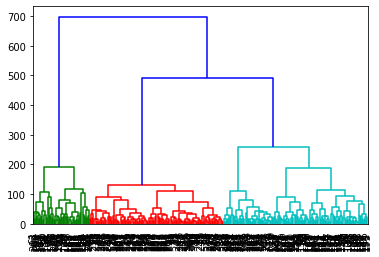

[[10  0 50]
 [94 52  2]
 [29  0 71]]
0.476801125406344


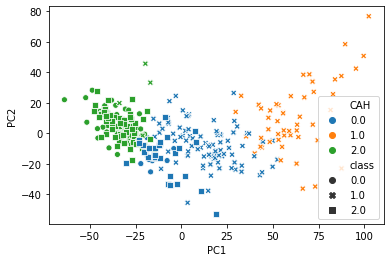

In [ ]:




from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    default_kwargs = dict(leaf_font_size=10)
    default_kwargs.update(kwargs or {})

    dendrogram(linkage_matrix, **default_kwargs)



cah = AgglomerativeClustering(affinity="euclidean", linkage="ward", distance_threshold=0,n_clusters=None)
cah.fit(data)
plot_dendrogram(cah)
plt.show()

cah2 = AgglomerativeClustering(affinity="euclidean", linkage="ward", distance_threshold=None,n_clusters=3)
cah2.fit(data)
labelsCah =pd.Series(cah2.labels_, name="CAH")


scatterplot_pca(data=data, hue=labelsCah, style=data["class"])

y_true = data["class"]
y_pred = labelsCah
print(confusion_matrix(y_true, y_pred, labels=[0,1,2]))
print(f1_score(y_true, y_pred, average="weighted"))

# Plot All Scores

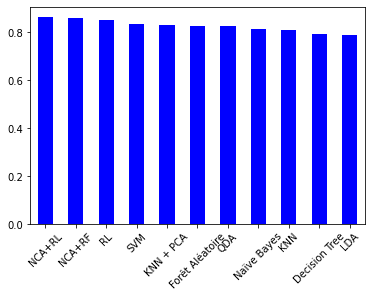

In [ ]:

name = ['KNN + PCA', 'KNN', 'LDA','QDA','Decision Tree', 'SVM', 'Forêt Aléatoire','RL','Naïve Bayes', 'NCA+RF', 'NCA+RL']
scores = [0.8314648334214703, 0.8117398202009518, 0.7903225806451613,0.8258064516129032,0.7924731182795699,0.8335221350357216,0.828609201480698,0.8516129032258064,0.8161290322580644, 0.86086022, 0.8644086]
df = pd.DataFrame({'x' : name , 'y' : scores})
df = df.sort_values('y',ascending=False)

fig, ax = plt.subplots()
df.plot(kind='bar',y='y', color='b',ax=ax)
ax.get_legend().remove()
plt.xticks(range(len(scores)),df['x'],rotation=45)
plt.show()

